# Mushroom Classification Analysis

In [1]:
pip install ucimlrepo


## Initial Exploration

```
# This is formatted as code
```



In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import numpy as np
from scipy.stats import chi2_contingency

# Fetch dataset
mushroom = fetch_ucirepo(id=73)

# Create DataFrame with proper column names
df = pd.concat([mushroom.data.features, mushroom.data.targets], axis=1)

df # Print the entire dataset


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


In [5]:
#First row
first_row = df.iloc[0]  # Gets first row as a Series
print(first_row)


cap-shape                   x
cap-surface                 s
cap-color                   n
bruises                     t
odor                        p
gill-attachment             f
gill-spacing                c
gill-size                   n
gill-color                  k
stalk-shape                 e
stalk-root                  e
stalk-surface-above-ring    s
stalk-surface-below-ring    s
stalk-color-above-ring      w
stalk-color-below-ring      w
veil-type                   p
veil-color                  w
ring-number                 o
ring-type                   p
spore-print-color           k
population                  s
habitat                     u
poisonous                   p
Name: 0, dtype: object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [7]:
display(df.describe())

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


In [8]:
#Check for the missing values
missing_values = df.isnull().sum()
print('Missing values :' , missing_values[missing_values > 0])

df.replace('?', pd.NA, inplace=True)
print(df.isna().sum())

Missing values : stalk-root    2480
dtype: int64
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64


## Visualization

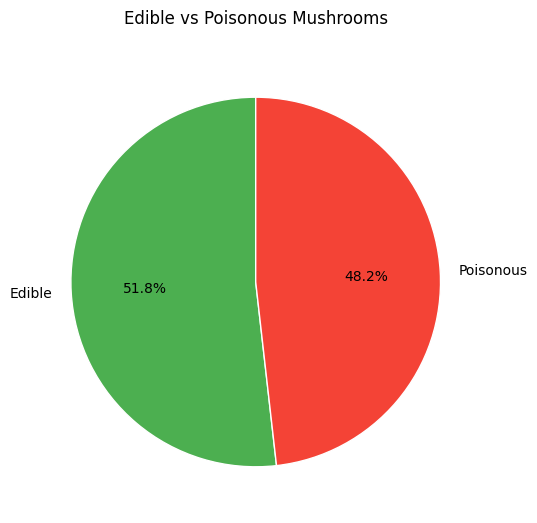

In [9]:
# Edible Vs Poisonous

plt.figure(figsize=(6, 6))
df['poisonous'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#4CAF50', '#F44336'],
    labels=['Edible', 'Poisonous'],
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)
plt.title('Edible vs Poisonous Mushrooms', pad=20)
plt.ylabel('')
plt.show()

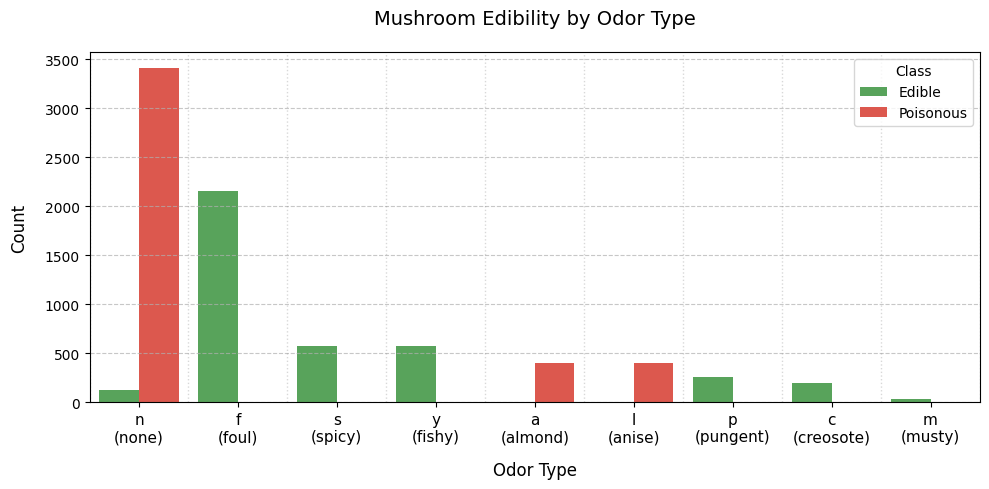

In [10]:
plt.figure(figsize=(10, 5))

# Define odor mapping and order
odor_map = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}
order = ['n', 'f', 's', 'y', 'a', 'l', 'p', 'c', 'm']

# Create the plot
ax = sns.countplot(data=df, x='odor', hue='poisonous',
                 palette=['#4CAF50', '#F44336'],
                 order=order)

# Explicitly set ticks before labels
ax.set_xticks(range(len(order)))
ax.set_xticklabels([f"{code}\n({odor_map[code]})" for code in order],
                  fontsize=11)

# Add vertical separators
for i in range(len(order)+1):
    ax.axvline(x=i-0.5, color='gray', linestyle=':', alpha=0.3, linewidth=1)

plt.title('Mushroom Edibility by Odor Type', fontsize=14, pad=20)
plt.xlabel('Odor Type', fontsize=12, labelpad=12)
plt.ylabel('Count', fontsize=12, labelpad=12)
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

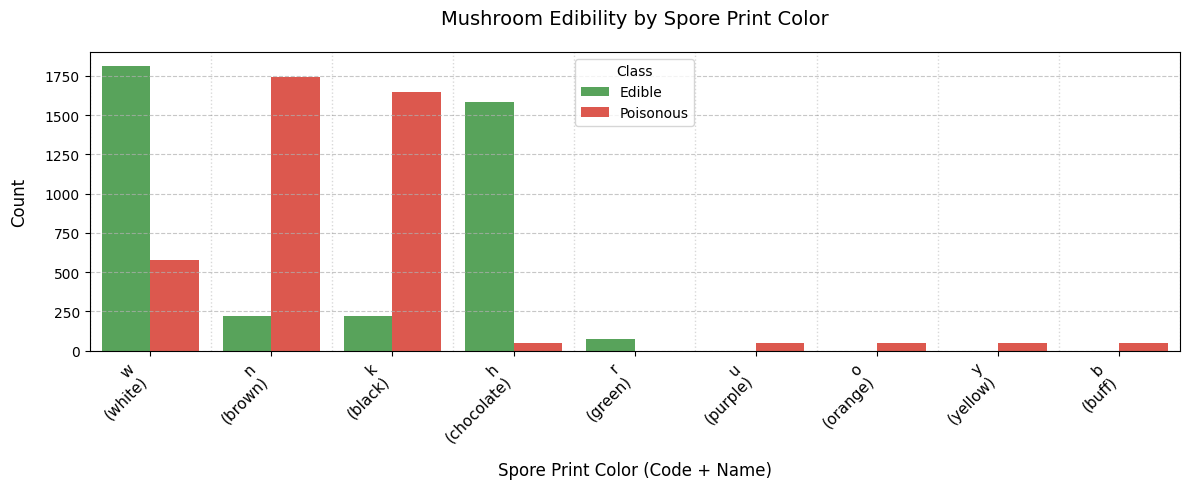

In [12]:
# Spore Print Color analysis

plt.figure(figsize=(12, 5))

# Define color mapping for labels
color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}

# Create ordered list of colors (by frequency)
order = df['spore-print-color'].value_counts().index

ax = sns.countplot(data=df, x='spore-print-color', hue='poisonous',
                 palette=['#4CAF50','#F44336'],
                 order=order)

# Fix for the warning: Set ticks explicitly before labels
ax.set_xticks(range(len(order)))
ax.set_xticklabels([f"{code}\n({color_map[code]})" for code in order],
                  fontsize=11, rotation=45, ha='right')

# Add vertical separators between categories
for i in range(len(order)+1):
    ax.axvline(x=i-0.5, color='gray', linestyle=':', alpha=0.3, linewidth=1)


# Add titles and labels
plt.title('Mushroom Edibility by Spore Print Color',
         fontsize=14, pad=20)
plt.xlabel('Spore Print Color (Code + Name)', fontsize=12, labelpad=12)
plt.ylabel('Count', fontsize=12, labelpad=12)
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

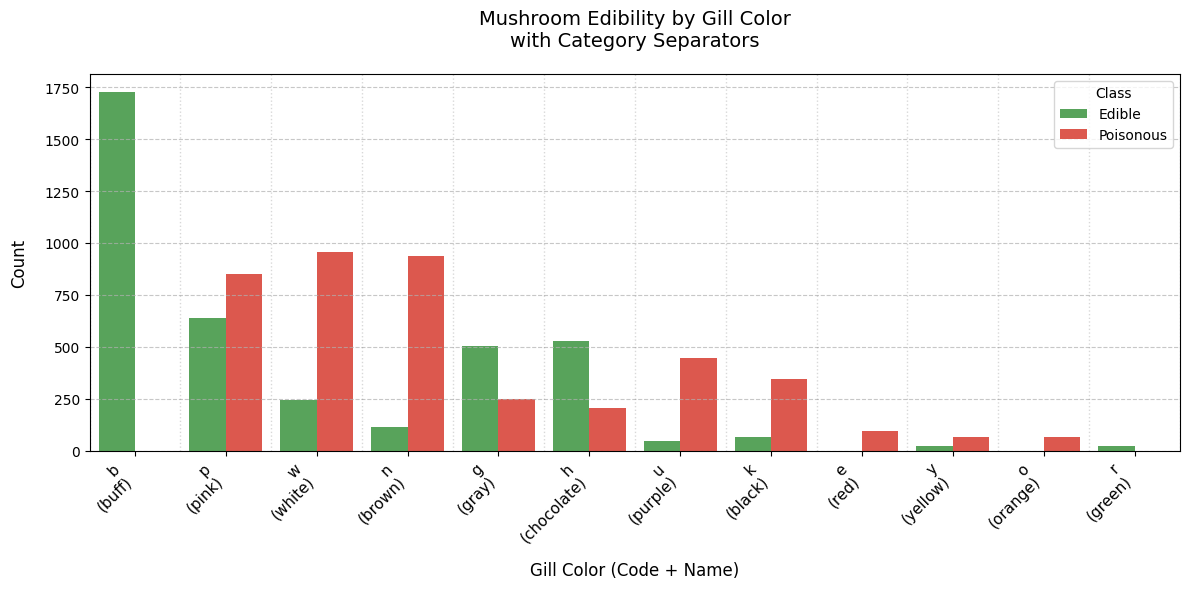

In [13]:
plt.figure(figsize=(12, 6))

# Define gill color mapping for labels
gill_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink',
    'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

# Create ordered list by frequency
order = df['gill-color'].value_counts().index

ax = sns.countplot(data=df, x='gill-color', hue='poisonous',
                 palette=['#4CAF50','#F44336'],
                 order=order)

# Fix tick positions before labels
ax.set_xticks(range(len(order)))
ax.set_xticklabels([f"{code}\n({gill_color_map[code]})" for code in order],
                  fontsize=11, rotation=45, ha='right')

# Add vertical separators
for i in range(len(order)+1):
    ax.axvline(x=i-0.5, color='gray', linestyle=':', alpha=0.3, linewidth=1)


# Styling
plt.title('Mushroom Edibility by Gill Color\nwith Category Separators',
         fontsize=14, pad=20)
plt.xlabel('Gill Color (Code + Name)', fontsize=12, labelpad=12)
plt.ylabel('Count', fontsize=12, labelpad=12)
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

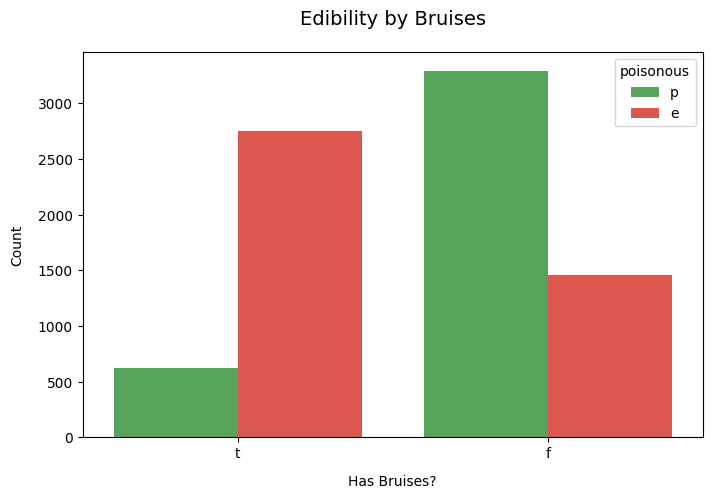

In [14]:

# Bruises Analysis
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='bruises', hue='poisonous',
                  palette=['#4CAF50','#F44336'])
plt.title('Edibility by Bruises', pad=20, fontsize=14)
plt.xlabel('Has Bruises?', labelpad=10)
plt.ylabel('Count', labelpad=10)


plt.show()

In [39]:
#df['veil-color'].value_counts()
df['veil-type'].value_counts()

,count
veil-type,
p,8124


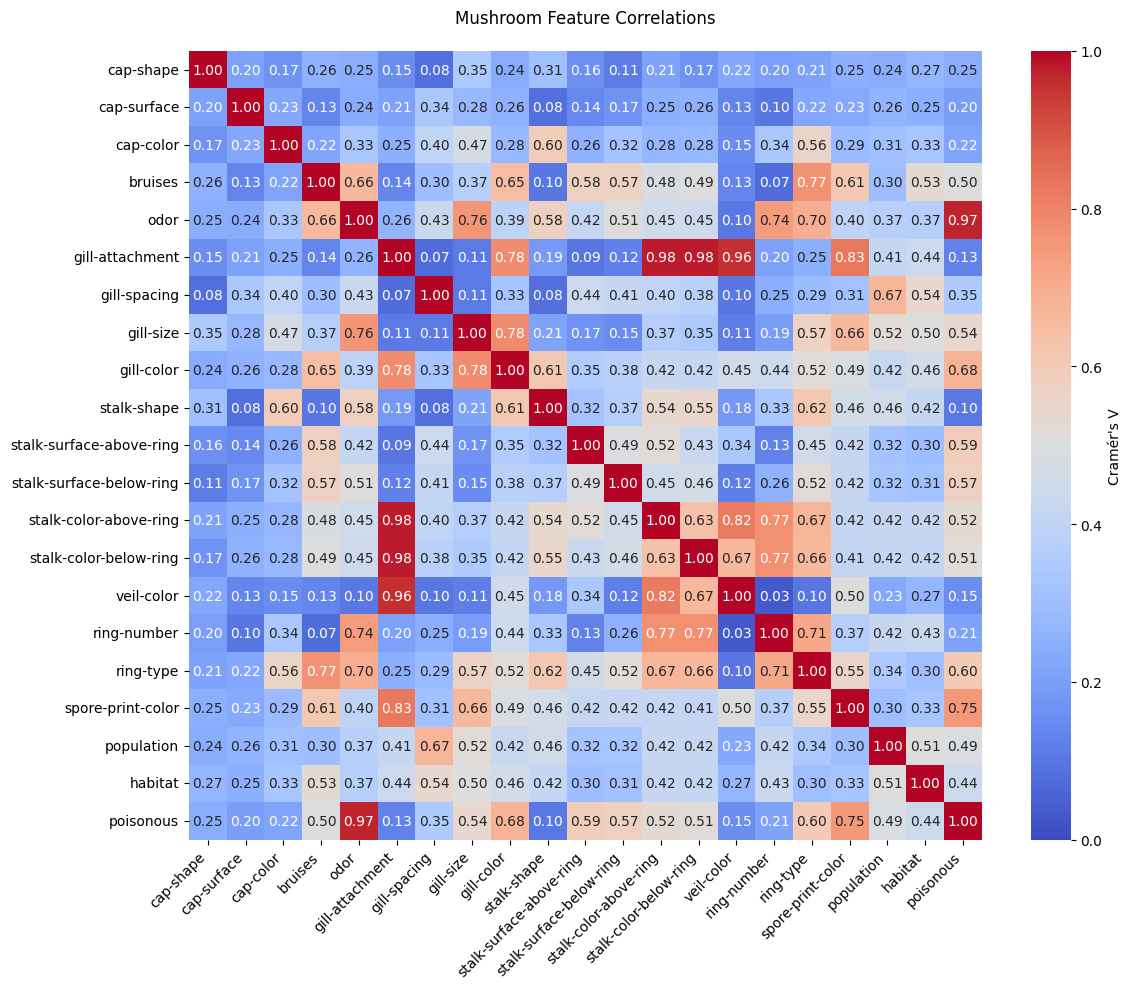

In [3]:


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    try:
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        denominator = min((k-1), (r-1))
        return 0.0 if denominator == 0 else np.sqrt(phi2 / denominator)
    except:
        return np.nan

df = df.drop(columns=['stalk-root'])
df = df.replace('?', np.nan).dropna()
df = df.loc[:, df.nunique() > 1]  # Drop constant columns ( See thhe veil type )

# Calculate correlation matrix
corr_matrix = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
for col1 in df.columns:
    for col2 in df.columns:
        corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
 # All the diagonal value should be 1 ( This is because, Cramér’s V, which is designed for association between two categorical variables.
 # But when comparing a variable to itself, Cramér’s V doesn't always return exactly 1)
np.fill_diagonal(corr_matrix.values, 1.0)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",
           cmap="coolwarm", vmin=0, vmax=1,
           cbar_kws={'label': "Cramér's V"})
plt.title("Mushroom Feature Correlations", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("mushroom_correlation_heatmap.png", dpi=300)  # You can change the filename or format
plt.show()

## Data Preprocessing & modeling


In [4]:
# Strategy: Since only 'stalk-root' has missing values (2480 out of 8124),and it's about 30% missing, we'll drop the column
# df = df.drop(columns=['stalk-root'])
df = df.replace('?', np.nan).dropna()
df = df.loc[:, df.nunique() > 1]  # Drop constant columns ( See thhe veil type )
print(df.shape)

(8124, 21)


In [5]:
# Handling Categorical Data (One-Hot Encoding)
# Separate features and target
X = df.drop(columns=['poisonous'])  # trainable features
y = df['poisonous']                 # target

# One-hot encode all categorical features
X_encoded = pd.get_dummies(X,  drop_first=True)
print("\nAfter one-hot encoding:")
print("Features shape:", X_encoded.shape)

y_encoded = y.map({'e': 0, 'p': 1})

# Combine encoded features with target
df_processed = pd.concat([X_encoded, y_encoded], axis=1)

# Final dataset
print("\nFinal processed dataset shape:", df_processed.shape)
print(df_processed.head())
df_processed


After one-hot encoding:
Features shape: (8124, 91)

Final processed dataset shape: (8124, 92)
   cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0        False        False        False        False         True   
1        False        False        False        False         True   
2        False        False        False        False        False   
3        False        False        False        False         True   
4        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  cap-color_e  ...  \
0          False           True          False        False        False  ...   
1          False           True          False        False        False  ...   
2          False           True          False        False        False  ...   
3          False          False           True        False        False  ...   
4          False           True          False        False        False  ...  

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,poisonous
0,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,1
1,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,0
2,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,0
3,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,1
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,0
8120,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,True,False,False,False,False,0
8121,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,0
8122,False,False,True,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,1


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

# Initialize and train decision tree
model = DecisionTreeClassifier(
    max_depth=5,           # Slightly deeper for complex feature space
    min_samples_split=10,  # More splits allowed
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [8]:
# Evaluate
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, model.predict(X_test)))

Training Accuracy: 1.000
Test Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



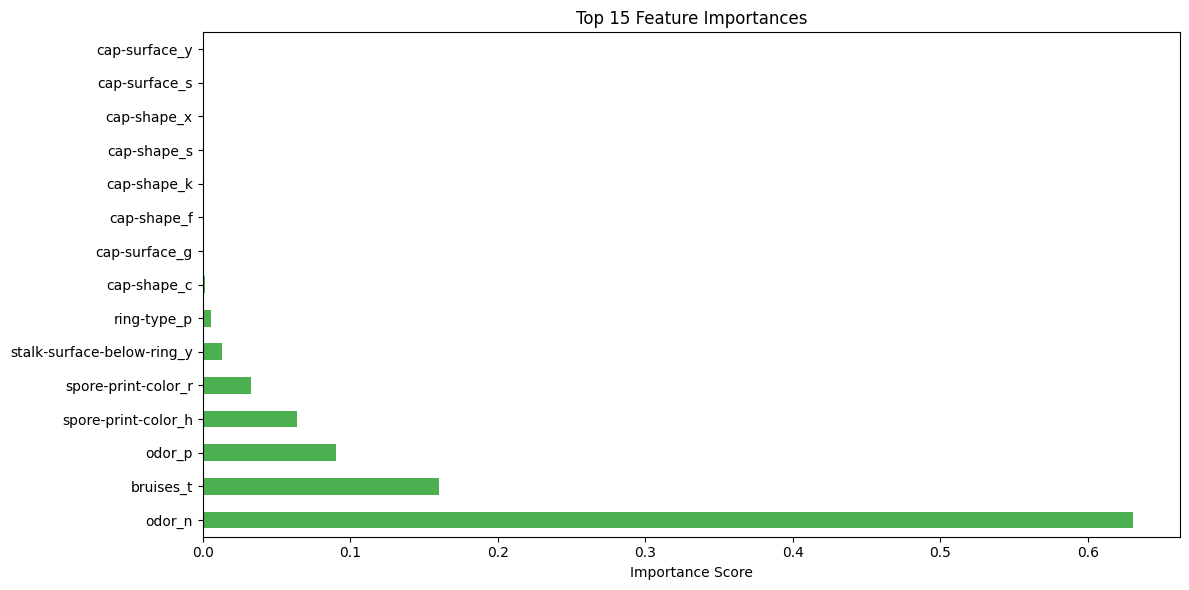

In [9]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
pd.Series(model.feature_importances_, index=X_encoded.columns) \
  .nlargest(15) \
  .plot(kind='barh', color='#4CAF50')
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

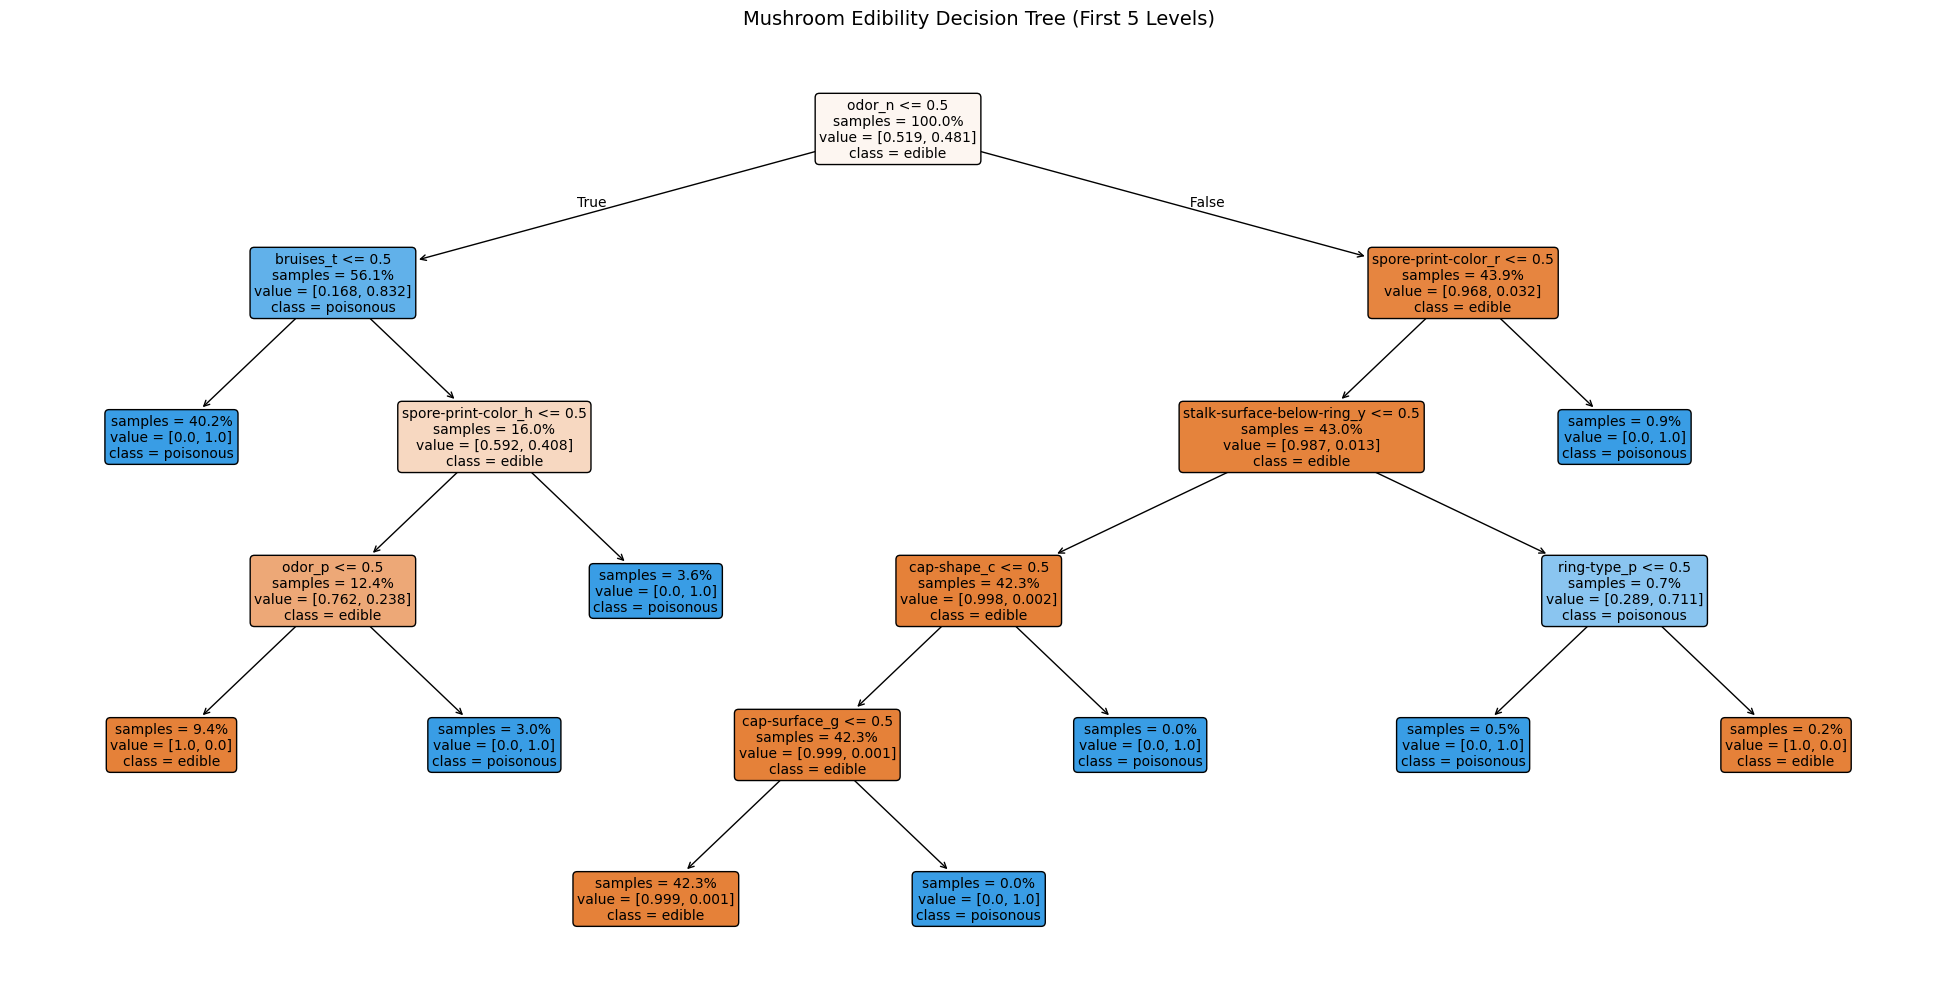

In [10]:
plt.figure(figsize=(25, 12))
plot_tree(
    model,
    feature_names=X_encoded.columns,
    class_names=['edible', 'poisonous'],
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=5,  # Limit depth for readability
    fontsize=10,
    impurity=False
)
plt.title("Mushroom Edibility Decision Tree (First 5 Levels)", pad=20, fontsize=14)
plt.show()

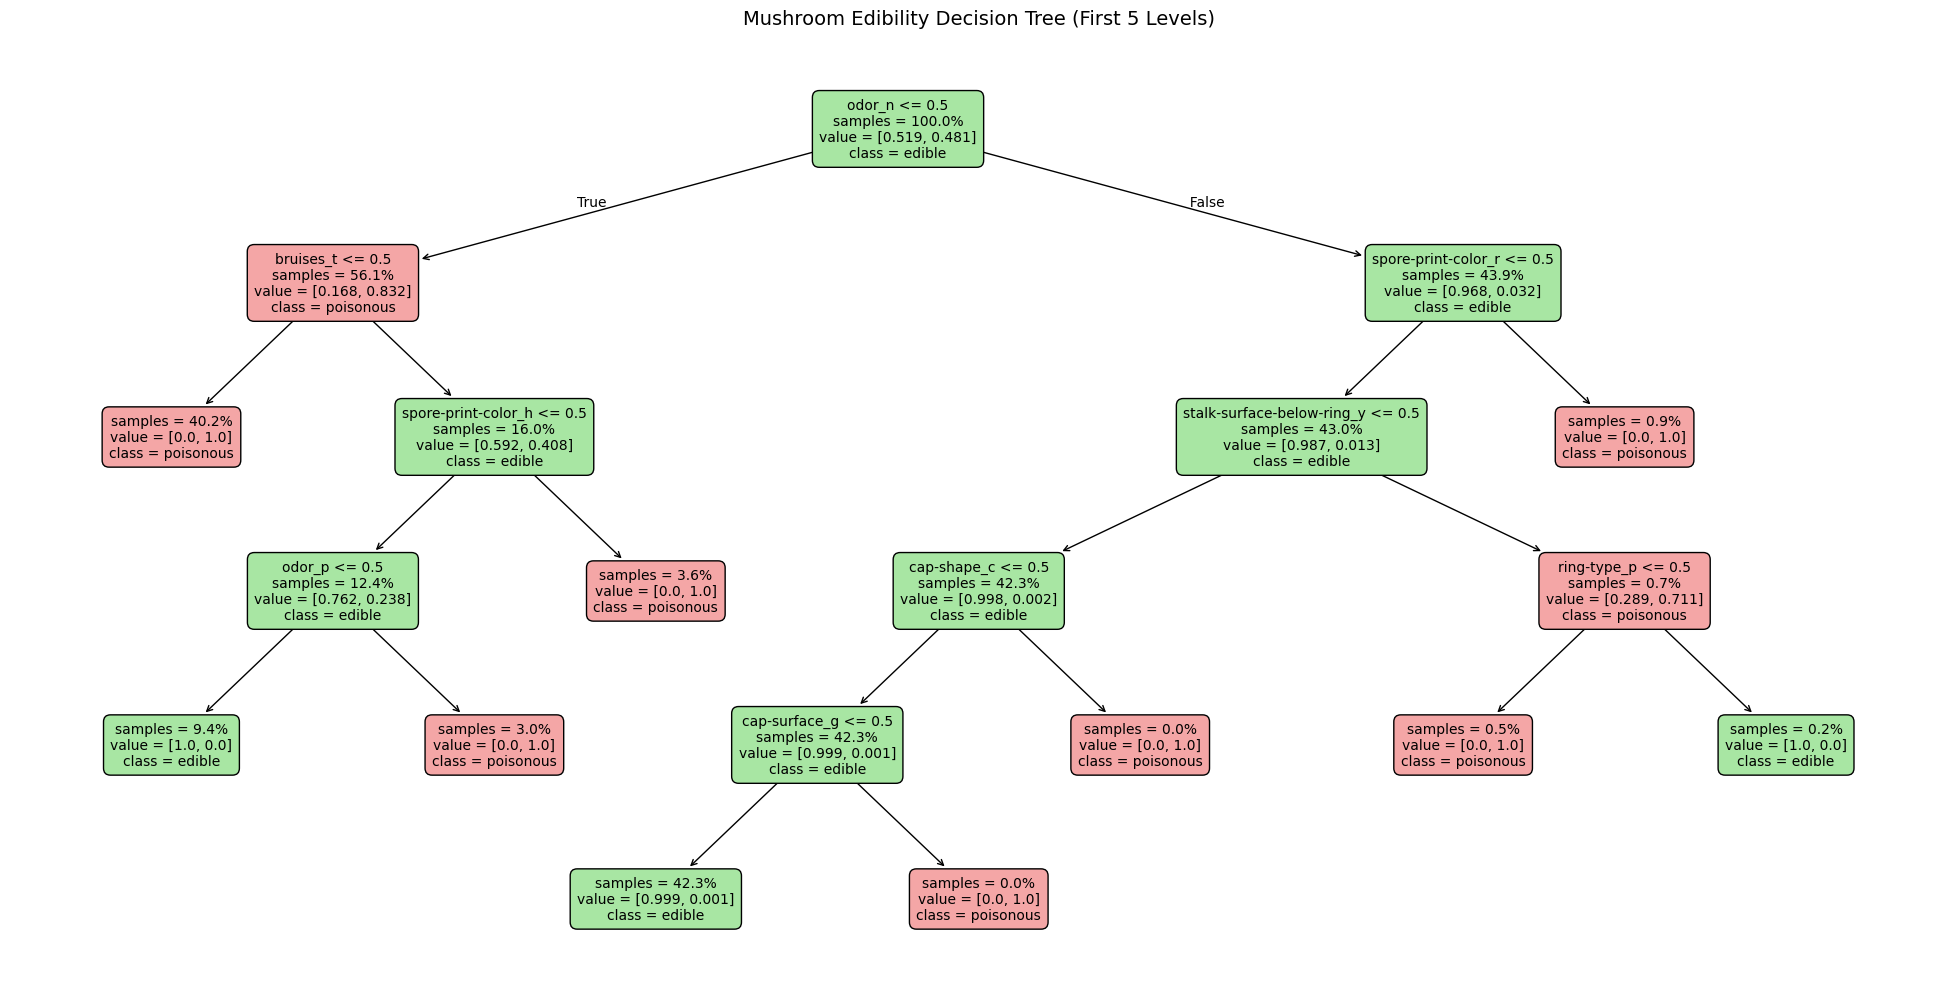

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Get class index to color mapping
# class 0 = edible (green), class 1 = poisonous (red)
colors = ['#A8E6A3', '#F4A6A6']  # light green and light red

# Generate the tree plot
fig = plt.figure(figsize=(25, 12))
tree_plot = plot_tree(
    model,
    feature_names=X_encoded.columns,
    class_names=['edible', 'poisonous'],
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=5,
    fontsize=10,
    impurity=False
)

# Apply custom colors to nodes
# Each box is a Text object in tree_plot
for i, box in enumerate(tree_plot):
    if hasattr(box, 'get_text'):
        text = box.get_text()
        if 'class = edible' in text:
            box.set_bbox(dict(facecolor=colors[0], edgecolor='black', boxstyle='round,pad=0.5'))
        elif 'class = poisonous' in text:
            box.set_bbox(dict(facecolor=colors[1], edgecolor='black', boxstyle='round,pad=0.5'))

plt.title("Mushroom Edibility Decision Tree (First 5 Levels)", pad=20, fontsize=14)
plt.show()


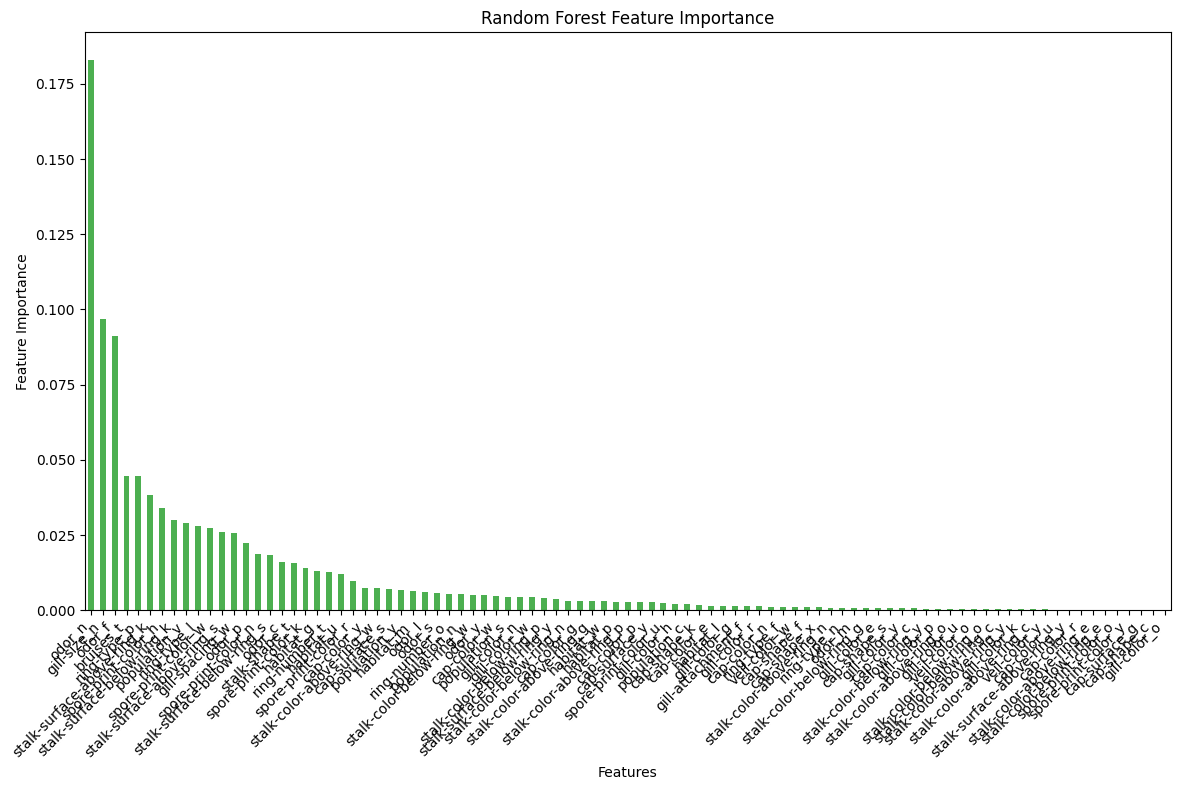

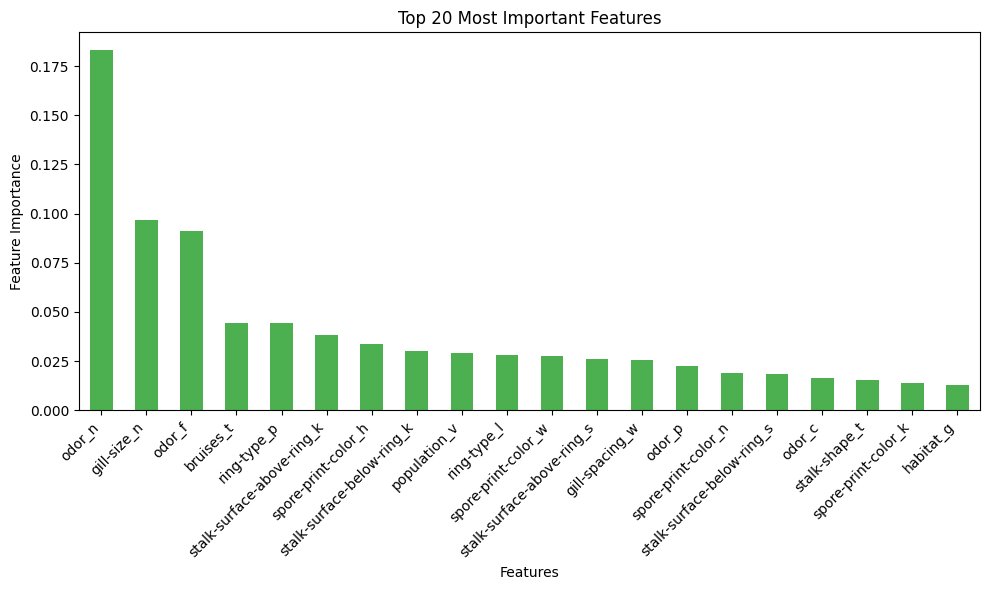

In [15]:
# Random forest classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',  # Try √n features per split
    min_samples_leaf=5,   # Prevent overfitting
    random_state=42
)
rf.fit(X_train, y_train)

# Feature importance with fixed x-axis
plt.figure(figsize=(12, 8))
feature_importance = pd.Series(rf.feature_importances_, index=X_encoded.columns) \
    .sort_values(ascending=False)

# Create the plot
ax = feature_importance.plot(kind='bar', color='#4CAF50')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Alternative: Show only top N most important features for better readability
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(20)
ax = top_features.plot(kind='bar', color='#4CAF50')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.tight_layout()
plt.show()